In [2]:
import cv2
import yaml
import numpy as np
from yaml.loader import SafeLoader

In [3]:
# pip install PyYAML

In [4]:
# pip install --upgrade pip

In [5]:
# pip install opencv-python

In [6]:
# pip show opencv-python

In [7]:
# load yaml

# load model

# load images for test

# get yolo prediction

# non max suprresion

# draw bounding boxes

In [8]:
# load yaml

with open('data.yaml',mode = 'r')as f:
    data_yaml = yaml.load(f,Loader = SafeLoader)
    print(data_yaml)

{'train': '/Users/harshalrajput/Desktop/Tensorflow/archive(2)/VOC2012/train', 'val': '/Users/harshalrajput/Desktop/Tensorflow/archive(2)/VOC2012/test', 'nc': 20, 'names': ['sofa', 'chair', 'pottedplant', 'person', 'sheep', 'tvmonitor', 'bottle', 'dog', 'car', 'boat', 'horse', 'train', 'cat', 'diningtable', 'bus', 'motorbike', 'aeroplane', 'bird', 'bicycle', 'cow']}


In [9]:
lables = data_yaml['names']
print(lables)

['sofa', 'chair', 'pottedplant', 'person', 'sheep', 'tvmonitor', 'bottle', 'dog', 'car', 'boat', 'horse', 'train', 'cat', 'diningtable', 'bus', 'motorbike', 'aeroplane', 'bird', 'bicycle', 'cow']


In [10]:
# load model

yolo = cv2.dnn.readNetFromONNX('/Users/harshalrajput/Desktop/yolo_project/Model/weights/best.onnx')

# model train on gpu and we are testing on cpu
yolo.setPreferableBackend(cv2.dnn.DNN_BACKEND_OPENCV)
yolo.setPreferableTarget(cv2.dnn.DNN_TARGET_CPU)

In [11]:
print('hello')

hello


In [12]:
# load image
img = cv2.imread('/Users/harshalrajput/Desktop/yolo_project/street_image.jpg')
image = img.copy()

# cv2.imshow('image' ,image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [13]:
image.shape

(2713, 5446, 3)

In [14]:
rows, column , d = image.shape #  i.e (height, width, colur density(r,g,b))

In [15]:
# for prediction we have to convert image into sqare matrix
# create a dummy matrix

# step -1 convert image into square matrix

max_rc = max(rows,column)
input_image  = np.zeros((max_rc,max_rc,3),dtype =np.uint8) #A uint8 data type contains all whole numbers from 0 to 255.
input_image[0:rows,0:column] = image # on this black image we have to overlay our image


In [17]:
input_image.shape

(5446, 5446, 3)

In [16]:
# blob[0,1].shape

In [17]:
# step - 2 get prediction from square array

INPUT_WH_YOLO = 640 # we train aur model on this image size
blob = cv2.dnn.blobFromImage(input_image,1/255,(INPUT_WH_YOLO,INPUT_WH_YOLO),swapRB = True,crop = False)
yolo.setInput(blob)
pred = yolo.forward()  # prediction from yolo


In [18]:
print(pred)

[[[7.5876980e+00 6.7570238e+00 1.7506033e+01 ... 8.4322125e-02
   3.7512791e-03 6.8092952e-03]
  [1.3189599e+01 7.1508551e+00 2.4202408e+01 ... 7.8618772e-02
   3.5196622e-03 4.9974145e-03]
  [1.6471813e+01 6.5850782e+00 2.6469213e+01 ... 8.0929480e-02
   3.4648227e-03 5.7585398e-03]
  ...
  [5.6093011e+02 6.0517053e+02 1.6915048e+02 ... 4.0995020e-02
   2.2234594e-02 1.3580426e-02]
  [5.8109637e+02 6.0694519e+02 1.2893930e+02 ... 4.8941012e-02
   2.4937030e-02 1.6126553e-02]
  [6.1186902e+02 6.1632458e+02 1.3905843e+02 ... 5.1521700e-02
   3.7635576e-02 2.0550294e-02]]]


In [19]:
print(pred.shape)

(1, 25200, 25)


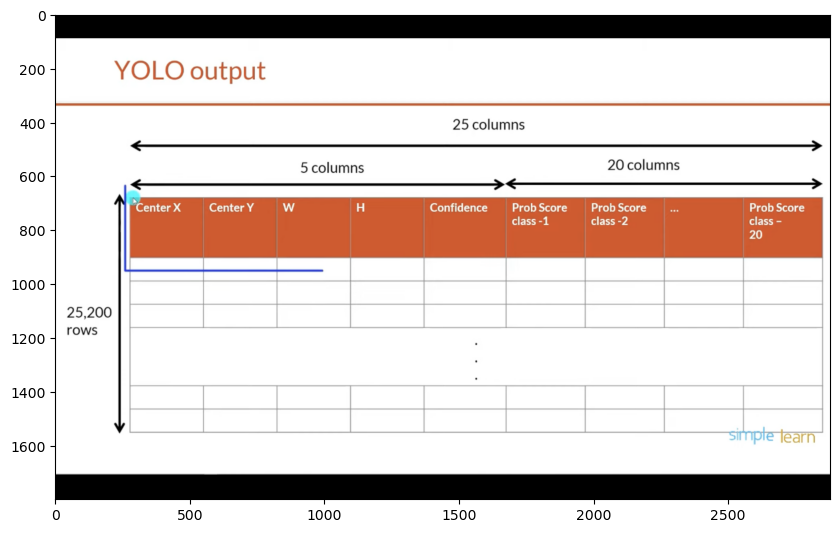

In [20]:
import matplotlib.pyplot as plt
imp = cv2.imread('/Users/harshalrajput/Desktop/yolo_project/yolo_outpu.jpg')

plt.figure(figsize=(10, 8))
plt.imshow(imp)

In [21]:
#25200 are rows ie number of bounding boxes and for those bounding boxes we have this information in 25 columns
# 25 columns = [xc,yc,w,h,comfidence,number of classes i.e 20]  total 25 columns

In [22]:
pred.shape

(1, 25200, 25)

In [23]:
pred[0].shape

(25200, 25)

In [18]:
input_image.shape

(5446, 5446, 3)

In [24]:
input_image.shape[:2]

(5446, 5446)

In [25]:
# print(range(len(detections)))

In [26]:
# here we are having multiple bounding boxes for single object so we are going to perform non max supression

In [42]:
# NON MAX SUPRESSION

# step1 filter detection based on confidence score (0.4) and probablity(0.25) 
#and for that we have to convert [xc,yc,w,h] into [xmin,xmax,ymin,ymax]

detections = pred[0]
INPUT_WH_YOLO =640
boxes = []
confidences = []
classes = []

# width and height of the input_image
image_w, image_h = input_image.shape[:2]
x_factor = image_w/INPUT_WH_YOLO
y_factor = image_h/INPUT_WH_YOLO

for i in range(len(detections)):  # now we are itering for each row in detections
    row = detections[i]
    confidence = row[4]   # confidence for detecting object
    
    if confidence>0.4:
        clas = row[5:].max()  # maximum probablity of obj
        clas_id = row[5:].argmax()   # position of maximum probablity of obj
        if clas>0.25:
            cx,cy,w,h = row[0:4]
            # constract bounding box
            # left top width height
            
            left = int((cx - 0.5*w)*x_factor)
            top = int((cy - 0.5*h)*y_factor)
            width = int(w*x_factor) 
            height  = int(h*y_factor)
            
            box = np.array([left,top,width,height])
            
            # append all values to list
            
            confidences.append(confidence)
            boxes.append(box)
            classes.append(clas_id)
            
# still there are some dublicate values are there whose confidence is same

boxes_np = np.array(boxes).tolist()
confidences_np = np.array(confidences).tolist()

# NON MAX SUPRESSION

index = cv2.dnn.NMSBoxes(boxes_np,confidences_np,0.25, 0.45).flatten()



In [43]:
index  # out of 25200 rows we need to consider these rows

array([  7,  90,  62,  48, 106,  94,  13, 107,  30,  34], dtype=int32)

In [29]:
len(index)  #10 objects have good confidence and good probablity

10

In [30]:
2713, 5446,

(2713, 5446)

In [31]:
fontscale = (640 * 6) / (1000 * 1000)
fontscale

0.00384

In [32]:
# draw bounding boxes

for i in index:
    x,y,w,h = boxes_np[i]
    bb_conf = int(confidences_np[i]*100)
    class_id = classes[i]
    class_name = lables[class_id]
    
    text = f'{class_name}: {bb_conf}%'
    
    #draw given  bounding boxes to obj
    cv2.rectangle(image,(x,y),(x+w,y+h), (0,255,0),5)
    cv2.rectangle(image,(x,y-50),(x+w,y),(255,255,255),-1)
    
    cv2.putText(image,text,(x,y-20),cv2.FONT_HERSHEY_PLAIN, 2,(0,0,0),2)
    

    


In [33]:
cv2.imshow("predicted", image)
cv2.imshow('orignal',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

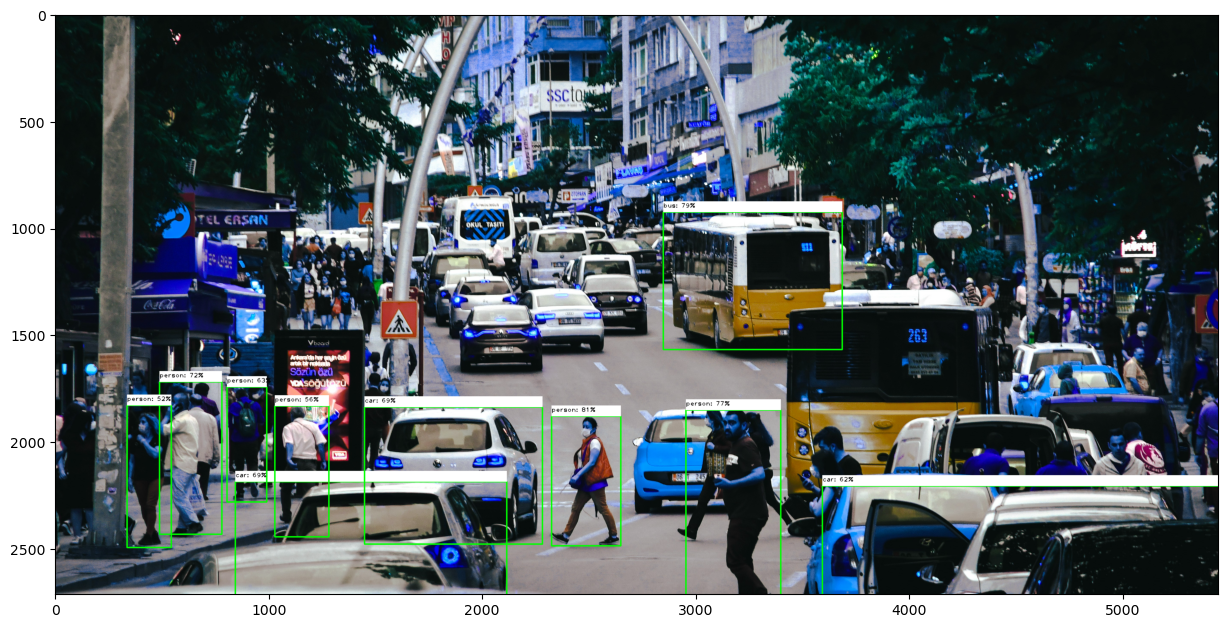

In [34]:
plt.figure(figsize=(15, 15))
plt.imshow(image)

In [35]:
def x(filename):
    with open(filename,mode = 'r')as f:
        data_yaml = yaml.load(f,Loader = SafeLoader)
        return data_yaml

In [36]:
with open('/Users/harshalrajput/Desktop/yolo_project/data.yaml',mode = 'r')as f:
        data_yaml = yaml.load(f,Loader = SafeLoader)
#         return data_yaml

In [37]:
def yolo_prediction(img_path, yaml_file_path, Model_path):
    # load yaml

    with open(yaml_file_path ,mode = 'r')as f:
        data_yaml = yaml.load(f,Loader = SafeLoader)

    lables = data_yaml['names']

    # load model

    yolo = cv2.dnn.readNetFromONNX(Model_path)

    # model train on gpu and we are testing on cpu
    yolo.setPreferableBackend(cv2.dnn.DNN_BACKEND_OPENCV)
    yolo.setPreferableTarget(cv2.dnn.DNN_TARGET_CPU)


    # load image
    img = cv2.imread(img_path)
    image = img.copy()

    rows, column , d = image.shape #  i.e (height, width, colur density(r,g,b))

    # step -1 convert image into square matrix

    max_rc = max(rows,column)
    input_image  = np.zeros((max_rc,max_rc,3),dtype =np.uint8) #A uint8 data type contains all whole numbers from 0 to 255.
    input_image[0:rows,0:column] = image # on this black image we have to overlay our image


    # step - 2 get prediction from square array

    INPUT_WH_YOLO = 640 # we train aur model on this image size
    blob = cv2.dnn.blobFromImage(input_image,1/255,(INPUT_WH_YOLO,INPUT_WH_YOLO),swapRB = True,crop = False)
    yolo.setInput(blob)
    pred = yolo.forward()  # prediction from yolo


    # NON MAX SUPRESSION

    # step1 filter detection based on confidence score (0.4) and probablity(0.25) 
    #and for that we have to convert [xc,yc,w,h] into [xmin,xmax,ymin,ymax]

    detections = pred[0]
    boxes = []
    confidences = []
    classes = []

    # width and height of the input_image
    image_w, image_h = input_image.shape[:2]
    x_factor = image_w/INPUT_WH_YOLO
    y_factor = image_h/INPUT_WH_YOLO

    for i in range(len(detections)):  # now we are itering for each row in detections
        row = detections[i]
        confidence = row[4]   # confidence for detecting object

        if confidence>0.4:
            clas = row[5:].max()  # maximum probablity of obj
            clas_id = row[5:].argmax()   # position of maximum probablity of obj
            if clas>0.25:
                cx,cy,w,h = row[0:4]
                # constract bounding box
                # left top width height

                left = int((cx - 0.5*w)*x_factor)
                top = int((cy - 0.5*h)*y_factor)
                width = int(w*x_factor) 
                height  = int(h*y_factor)

                box = np.array([left,top,width,height])

                # append all values to list

                confidences.append(confidence)
                boxes.append(box)
                classes.append(clas_id)

    # still there are some dublicate values are there whose confidence is same

    boxes_np = np.array(boxes).tolist()
    confidences_np = np.array(confidences).tolist()

    # NON MAX SUPRESSION

    index = cv2.dnn.NMSBoxes(boxes_np,confidences_np,0.25, 0.45).flatten()

    # drawing bounding boxes
    def generate_colour(ID):
        
        np.random.seed(10)   # to get the same colour every time you execute for same id
        colours = np.random.randint(100,255,size = (20,3)).tolist()
        
        return tuple(colours[ID])

    for i in index:
        x,y,w,h = boxes_np[i]
        bb_conf = int(confidences_np[i]*100)
        class_id = classes[i]
        class_name = lables[class_id]
        colour = generate_colour(class_id)

        text = f'{class_name}: {bb_conf}%'

        #draw given  bounding boxes to obj
        cv2.rectangle(image,(x,y),(x+w,y+h), colour,5)
        cv2.rectangle(image,(x,y-50),(x+w,y),colour,-1)

        cv2.putText(image,text,(x,y-20),cv2.FONT_HERSHEY_PLAIN, 2,(0,0,0),2)
        
    
        
        
    return image


In [3]:
Model_path = '/Users/harshalrajput/Desktop/yolo_project/Model/weights/best.onnx'
x = '/Users/harshalrajput/Desktop/yolo_project/street_image.jpg'
y = '/Users/harshalrajput/Desktop/yolo_project/data.yaml'

In [39]:

img_pred_1 = yolo_prediction(x,y,Model_path)

In [153]:
# yolo_pred(x, y, Model_path)

In [156]:
img = cv2.imread('/Users/harshalrajput/Desktop/yolo_project/street_image.jpg')
cv2.imshow("predicted", img_pred_1)
cv2.imshow('orignal',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
# predicting using py file

In [4]:
import cv2
from yolo_prediction import yolo_pred

In [5]:
Model_path = '/Users/harshalrajput/Desktop/yolo_project/Model/weights/best.onnx'
img_org = cv2.imread('/Users/harshalrajput/Desktop/yolo_project/street_image.jpg')
img = img_org.copy()
data_yaml = '/Users/harshalrajput/Desktop/yolo_project/data.yaml'

In [6]:
yolo = yolo_pred(Model_path,data_yaml)

In [7]:
# predictions

img_pred = yolo.predictions(img)

In [8]:
# img = cv2.imread('/Users/harshalrajput/Desktop/yolo_project/street_image.jpg')
cv2.imshow("predicted", img_pred)
cv2.imshow('orignal',img_org)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [94]:
   def generate_colour(ID):
        
        np.random.seed(10)   # to get the same colour every time you execute for same id
        colours = np.random.randint(100,255,size = (20,3)).tolist()
        
        return tuple(colours[ID])

In [95]:
generate_colour(2)

(213, 108, 173)

In [97]:
generate_colour(2)

(213, 108, 173)

# real time object detection

In [23]:
cap = cv2.VideoCapture('/Users/harshalrajput/Desktop/yolo_project/pexels-tim-samuel-5834623 (2160p).mp4')
yolo = yolo_pred(Model_path,data_yaml)

In [24]:
while True:
    ret, frame = cap.read()
    if ret == False:
        print('unable to read video')
        break
    pred_img = yolo.predictions(frame)
    
    cv2.imshow("YOLO", pred_img)
#     cv2.imshow('orignal',img_org)
    if cv2.waitKey(1) == 27:
        break
        
cv2.destroyAllWindows()
cap.release()